In [1]:
#import packages
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import shape, Point
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request, json
import requests
import urllib.parse
import datetime
import os
import dask.dataframe as dd
import calendar
from datetime import datetime, timedelta

from geopandas.tools import sjoin

import warnings
warnings.filterwarnings('ignore')

/Users/lizjohnson/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import nta shapefile
nta_url = 'https://data.cityofnewyork.us/resource/q2z5-ai38.json'

query = (nta_url+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())


for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
nta_nyc = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
nta_nyc = nta_nyc.drop(columns = ['the_geom'])
nta_nyc.head()

,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area,geometry
0,4,Queens,081,QN08,St. Albans,45401.316803,77412747.847,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,2,Bronx,005,BX28,Van Cortlandt Village,21945.719299,25666124.5948,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ..."
2,4,Queens,081,QN55,South Ozone Park,36708.1693055,82461393.7368,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ..."
3,3,Brooklyn,047,BK40,Windsor Terrace,19033.6720656,14041667.99,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ..."
4,3,Brooklyn,047,BK50,Canarsie,43703.6096661,82089678.6389,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."


In [26]:
len(nta_nyc['ntacode'].unique())

195

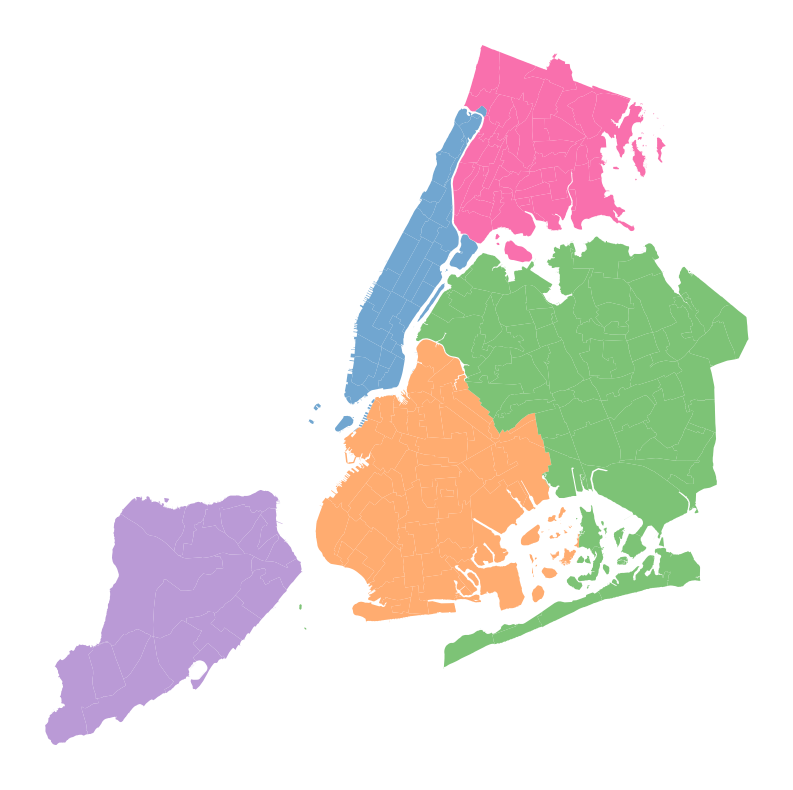

In [25]:
# Define a color map based on the boroughs
color_map = {'Staten Island': '#ba9ad6',
             'Brooklyn': '#ffac70',
             'Manhattan': '#71a6d0',
             'Bronx': '#f970ad',
             'Queens': '#7dc376'}

fig, ax = plt.subplots(figsize=(10, 10))
for boro, color in color_map.items():
    boro_gdf = nta_nyc[nta_nyc['boro_name']==boro]
    boro_gdf.plot(color = color, ax = ax)
# Add a title
# ax.set_title('NYC Neighborhoods by Borough', fontsize=20)

# Remove the axis ticks and labels
ax.axis('off')
plt.savefig('../Outputs/NYC_NTA_borough.png')
# Show the plot
plt.show()